# 확률적 경사 하강법(SGD: Stochastic(랜덤) Gradient(경사) Descent(하강))
- 머신러닝에도 많이 사용하지만 실질적으로는 딥러닝에서 많이 사용한다.
- 데이터가 추가 되었을 경우 머신러닝 처리 방법
- 랜덤으로 시작해 경사를 하강시키는 방법  
- 랜덤 시작해 기울기(편미분값)이 0이 되는 값을 찾으려고 점점 기울기가 낮은 쪽으로 가는 방법 

1. 새로운 데이터로 모델을 추가하여 새롭게 학습하여 처리한다.
2. 추가된 갯수만큼 기존의 데이터를 버리고 사용한다.
3. 기존 모델을 수정하면서 사용한다. (점진적 학습방법)

- 데이터가 추가하였을 경우에도 새로운 모델을 만들지 않고 기존의 모델을 수정하면서 사용할 수 있는 방법
- 머신러닝 및 딥러닝 알고리즘을 훈련하는 방법 또는 최적화 하는 방법이지 머신러닝이나 딥러닝 모델은 아님.
- 확률적 : 랜덤, 경사:기울기를 의미
- 곡선의 최적점을 찾기 위해 기울기를 기준으로 조금씩 이동하면서 최적점을 찾는 방법


데이터셋에서 데이터 1개만하면 확률적 경사하강법  
여러개 쓰면 미니배치 경사 하강법  
다쓰면 배치 경사 하강법  

조금씩 경사를 이동하면서 반복 데이터 다쓰면 데이터 리필함(리필이 EPOCH)

- Epoch : 훈련세트를 다 사용하였을 경우의 단계
- 미니배치(mini batch) 경사 하강법 중 미니배치의 갯수 : Hyper parameter, 보통은 2의 배수
- 배치경사 하강법 : 샘플을 한 번에 몽땅 꺼내면 컴퓨터 메모리나 CPU에 영향을 줄 수 있어서 거의 사용이 안되고 주로 확률적 경사하강법이나 미니배치를 사용한다.

### 손실함수(비용함수)
- 머신러닝 알고리즘이 에러율을 측정하는 함수
- 손실함수 값이 적은 것이 정확도가 높은 것이다.
- 확률적 경사함수를 통해서 손실함수가 낮은 값을 찾는 것이다.
- 분류함수인 경우에는 정확도를 사용하는 데 이정확도의 값은 미분함수가 없어서(연속성이 없어) 손실함수를 사용할 수 없다.
- 분류함수인 경우에는 로지스틱 손실함수, 이진크로스엔트로피 손실함수를 사용한다.

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
fish = pd.read_csv("../Data/fishes.csv")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [12]:
# Feature
fish_input = fish.drop('Species',axis=1).to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [13]:
# Target
fish_target = fish['Species'].to_numpy()
fish_target[:5]


array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [14]:
# Train Test 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split \
    (fish_input,fish_target,random_state=42)
    

In [15]:
# 표준화 시키기
# : 경사 하강법을 사용하는 경우에는 샘플의 크기 대문에 경사의 각도가 바뀔 수 있으므로 각 Featrue의 Scale을 
# 표준함수로 변경하여야 한다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

---
### 학률적 경사하강법의 분류 알고리즘 적용

In [18]:
from sklearn.linear_model import SGDClassifier

In [22]:
sc = SGDClassifier(
    loss = 'log',
    max_iter=10,
    random_state=42
)

# loss = 'log' : 로지스틱 손실함수
# max_iter = 10 : Epoch

In [23]:
sc.fit(train_scaled,train_target)
print('train score', sc.score(train_scaled,train_target))
print('test score', sc.score(test_scaled,test_target))

train score 0.773109243697479
test score 0.775


> score가 별로 않좋고 과소적합 되어서  
> partial_fit을 사용한다. 기존 w와 b의 계수값을 유지한채 Update하는 방법  
> 만약에 다시 fit을 사용하면 기존에 학습했던 내용을 모두 버린다.  

In [99]:
for i in range(10000):
    sc.partial_fit(train_scaled,train_target)
    print('train score', sc.score(train_scaled,train_target))
    print('test score', sc.score(test_scaled,test_target))


train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test score 0.925
train score 0.9411764705882353
test scor

> 처음의 점수보다 기존에 학습했던 내용에 새로운 학습내용을 수정해서 사용하면 점수가 증가했다.  
> 이와 같이 점진적으로 정확도를 높이는 방법이 확률적 경사 하강법이다.  
> 처음보다는 점수가 증가했지만 아직 과소적합이다. 약간의 차이가 나는 과대적합이 좋은 방법이다.  

------
### Epoch와 과대/과소적합
- 규제값이 작아지면 과대적합이 된다.
- 조기종료(Early Stopping) : 적합한 Epoch의 위치를 찾으면 종료한다.

In [103]:
import numpy as np
sc = SGDClassifier(loss= 'log', random_state=42) # 머신러닝은 log 로지스틱회귀 이고 SGDC는 경사하강법 함수임
train_score = []
test_score = []
classes = np.unique(train_target)
classes


array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [105]:
for _ in range(0,300): # i 를 안쓰고 횟수만 돌릴때 _를 씀
    sc.partial_fit(train_scaled,train_target, classes=classes)
    # partial_fit을 하기전에 fit를 사용하지 않았으면, classes를 정의에 주어야 부분 수정이 아니라 전체 수정 작업이 일어난다.
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled, test_target))




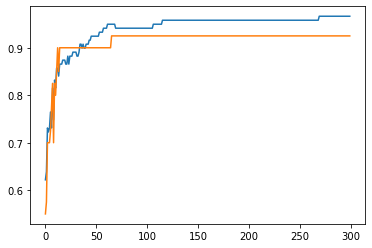

In [109]:
# 그래프로 그려보기
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.show()

> 100 정도의 Epoch가 좋은 것 같다.

In [152]:
# 새롭게 시작
sc = SGDClassifier(loss = 'log', max_iter = 100, tol=1.0e-3, random_state=42) 
# tol = 1.0e-3 default , tol 음수는 None과 같음, 위 그래프에서는 테스트가 트레이닝을 넘기때문에 조기 종료를 쓰면 안되는 케이스
# tol : 조기 종료 시점이나 현재는 정지기준이 없고 반복기간만이 최적의 손실값보다 큰 경우 조기 종료 된다.
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8403361344537815
0.8


---
### SVM을 이용한 확률적 경사 하강법

In [153]:
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state= 42) # hinge : SVM
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


0.9495798319327731
0.925


선형회귀

y= wx + b